<a href="https://colab.research.google.com/github/MehediNoor911/NumPy/blob/main/ID_203092_Md_Mehedi_Hasan_1Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1:**
A healthy child’s systolic blood pressure p (in millimeters of mercury) and weight w (in pounds) are approximately related by the equation,

$$p = \beta_0 + \beta_1 \log(w)$$

Hint: consider $x = \log(w)$

Use the following experimental data to estimate the systolic blood pressure of a healthy child weighing 100 pounds.

<table>
  <tr>
    <td>w</td>
    <td>44</td>
    <td>61</td>
    <td>81</td>
    <td>113</td>
    <td>131</td>
  </tr>

  <tr>
    <td>p</td>
    <td>91</td>
    <td>98</td>
    <td>103</td>
    <td>110</td>
    <td>112</td>
  </tr>
</table>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# write your code here
w = np.array([44, 61, 81, 113, 131])
x = np.log(w)

p = np.array([91, 98, 103, 110, 112])

x_mean = np.sum(x)/x.size
p_mean = np.sum(p)/p.size

x_demean = x - x_mean
p_demean = p - p_mean

std_x = np.sqrt(np.dot(x_demean, x_demean)/x_demean.size)
std_p = np.sqrt(np.dot(p_demean, p_demean)/p_demean.size)

pearson_rho = np.dot(x_demean, p_demean)/np.sqrt(np.dot(x_demean, x_demean) * np.dot(p_demean, p_demean))
print(std_x, std_p, pearson_rho)

0.39837516085010144 7.730459236035075 0.9989706897592904


In [ ]:
beta1 = pearson_rho * (std_p/std_x)
beta0 = p_mean - beta1 * x_mean

print(f"beta0:{beta0} \nbeta1: {beta1}")

weight_100 = np.log(100)
systolic_pressure_100 = beta0 + beta1 * weight_100
print(f"Estimated systolic blood pressure for a child weighing 100 pounds: {systolic_pressure_100}")



beta0:17.924340124176084 
beta1: 19.38499925220945
Estimated systolic blood pressure for a child weighing 100 pounds: 107.1955607358525


## **Problem 2:**

In this assignment, you will implement linear regression (without using `np.polyfit`) and apply it to the [Assignment 3 Dataset](https://docs.google.com/spreadsheets/d/17dWB3kwgzPXRIeuS5YtrbdRHnpSzdH3m/edit?usp=sharing&ouid=101114531299819009465&rtpof=true&sd=true). The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

Use `pd.read_excel()` to read the file and make prediction of rainfall based on the average precipitation for past 10 days. Compare the $r^2$ value obtained from the linear regression with that obtained through quadratic regression (Hint: use `np.polyfit`)



In [ ]:
# write your code here
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/data
!ls

/content/drive/MyDrive/data
 bookprice.csv	 Dog			       'Lenna_(test_image).png'   rainfall_data.csv
 Cat		'gray_Lenna_(test_image).png'   PetImagesSmall.zip


In [ ]:
data = pd.read_csv("rainfall_data.csv")
#print(data)
data.head(56)
#print(data.columns)


In [ ]:
a,b = data["Average Precipitation (past 10 days)(mm)"].to_numpy(), data[" Possibility of Rainfall on 11th Day (%)"].to_numpy()


In [ ]:
a_mean = np.sum(a)/a.size
b_mean = np.sum(b)/b.size

a_demean = a - a_mean
b_demean = b - b_mean

std_a = np.sqrt(np.dot(a_demean, a_demean)/a_demean.size)
std_b = np.sqrt(np.dot(b_demean, b_demean)/b_demean.size)

pearson_rho = np.dot(a_demean, b_demean)/np.sqrt(np.dot(a_demean, a_demean) * np.dot(b_demean, b_demean))

c2 = pearson_rho * (std_b/std_a)
c1 = b_mean - c2 * a_mean

In [ ]:
print(c1, c2)

15.034654819338627 1.2077835075638372


In [ ]:
def f(x):
  return c1 + c2*x

25.6 66.5


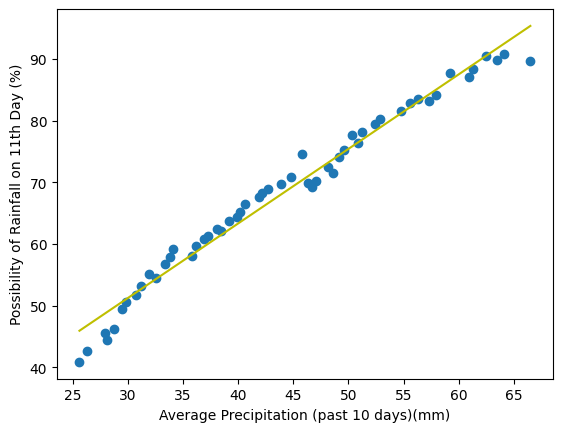

In [ ]:
min_point= np.min(a)
max_point= np.max(a)
x = np.linspace(min_point, max_point, 100)
y = f(x)
print(min_point, max_point)
plt.scatter(a, b)
plt.plot(x, y, "y")
plt.xlabel("Average Precipitation (past 10 days)(mm)")
plt.ylabel("Possibility of Rainfall on 11th Day (%)")
plt.show()

In [ ]:
def f_L_R(x):
  return linear_coeffs[1] + linear_coeffs[0]*x

In [ ]:
def f_Q_R(x):
  return quadratic_coeffs[2] + quadratic_coeffs[1]*x + quadratic_coeffs[0]*x**2

In [ ]:

# Linear regression
linear_coeffs = np.polyfit(a, b, 1)
b_pred = f_L_R(a)
error = b - b_pred

SSE = np.dot(error, error)
SST = np.dot(b_demean, b_demean)

linear_r_squared = 1 - SSE/SST

# Quadratic regression
quadratic_coeffs = np.polyfit(a, b, 2)
b_pred = f_Q_R(a)
error = b - b_pred

SSE = np.dot(error, error)
SST = np.dot(b_demean, b_demean)

quadratic_r_squared = 1 - SSE/SST

print(f"R-squared value for Linear Regression: {linear_r_squared}" )
print(f"R-squared value for Quadratic Regression: {quadratic_r_squared}")

R-squared value for Linear Regression: 0.9774714628301312
R-squared value for Quadratic Regression: 0.9881519664679186
